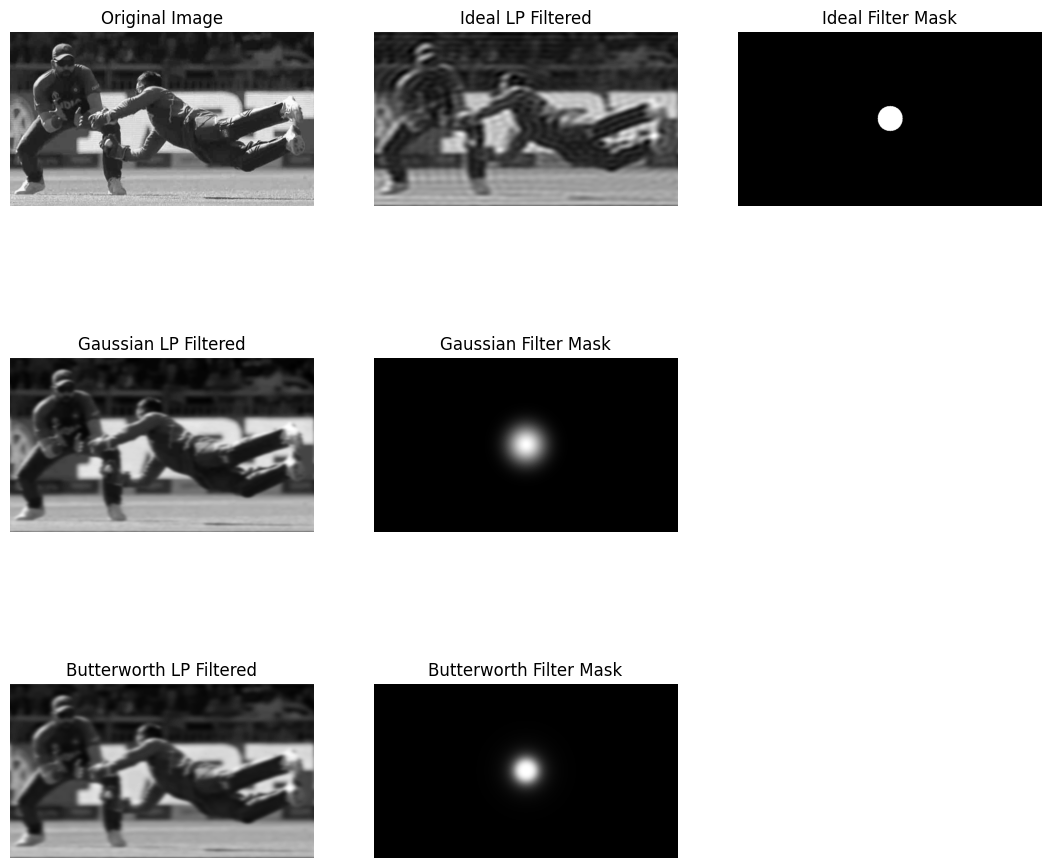

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ideal_low_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if d <= cutoff:
                mask[u, v] = 1

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def gaussian_low_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def butterworth_low_pass_filter(image, cutoff, order):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (d / cutoff) ** (2 * order))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def display_results(image, ideal_img, ideal_mask, gauss_img, gauss_mask, butter_img, butter_mask):
    plt.figure(figsize=(18, 12))

    # Original Image
    plt.subplot(3, 4, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Ideal Low-Pass Filter
    plt.subplot(3, 4, 2)
    plt.title("Ideal LP Filtered")
    plt.imshow(ideal_img, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.title("Ideal Filter Mask")
    plt.imshow(ideal_mask, cmap='gray')
    plt.axis('off')

    # Gaussian Low-Pass Filter
    plt.subplot(3, 4, 5)
    plt.title("Gaussian LP Filtered")
    plt.imshow(gauss_img, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.title("Gaussian Filter Mask")
    plt.imshow(gauss_mask, cmap='gray')
    plt.axis('off')

    # Butterworth Low-Pass Filter
    plt.subplot(3, 4, 9)
    plt.title("Butterworth LP Filtered")
    plt.imshow(butter_img, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.title("Butterworth Filter Mask")
    plt.imshow(butter_mask, cmap='gray')
    plt.axis('off')

    plt.show()

# Load the image and apply filters
image = cv2.imread('/content/dhoni-dive.jpg', cv2.IMREAD_GRAYSCALE)
cutoff_frequency = 30
order = 2

ideal_img, ideal_mask = ideal_low_pass_filter(image, cutoff_frequency)
gauss_img, gauss_mask = gaussian_low_pass_filter(image, cutoff_frequency)
butter_img, butter_mask = butterworth_low_pass_filter(image, cutoff_frequency, order)

# Display results
display_results(image, ideal_img, ideal_mask, gauss_img, gauss_mask, butter_img, butter_mask)